<a href="https://colab.research.google.com/github/arusk2/510hw1/blob/main/CS510_HW1_Ruskamp_White%2C_Andrew.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Problem 1

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Photos for #1.i: Image 1
Original:


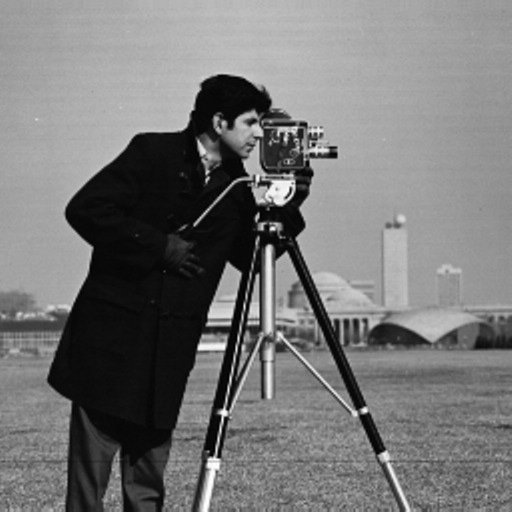

3x3 Gaussian Blur:


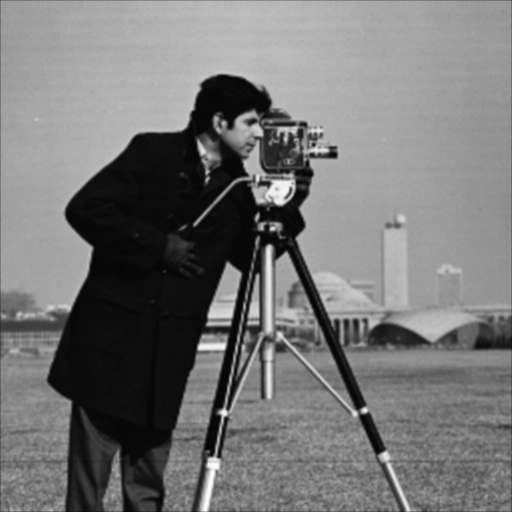

5x5 Gassian Blur:


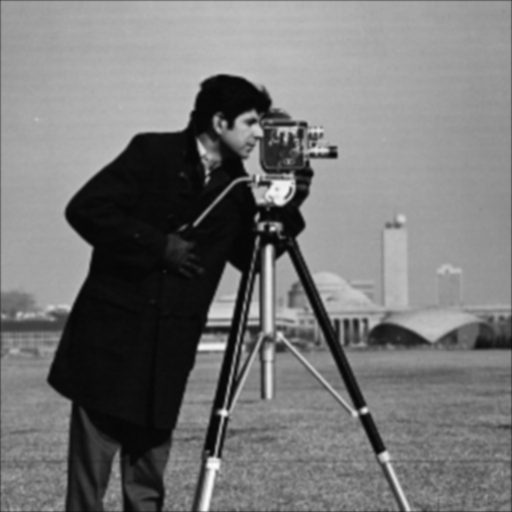

Photos for #1.ii: Using 3x3 Gaussian filtered photos of Image 1
DoG using gx filter:


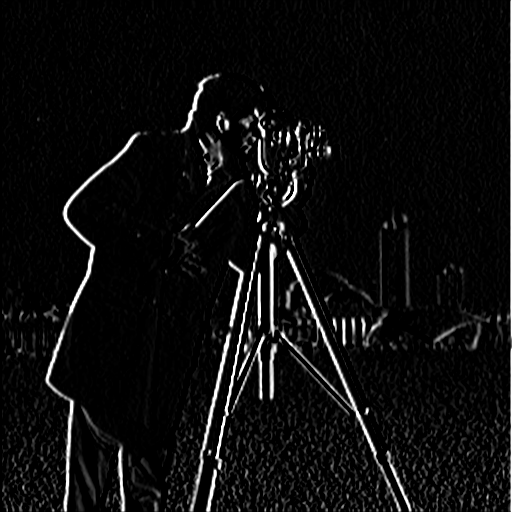

DoG using gy filter:


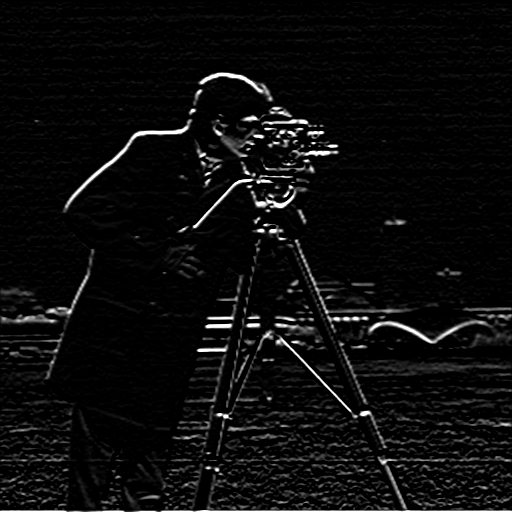

Photos for #1.iii: Sobel Filter using my_sobel_filter of Image 1


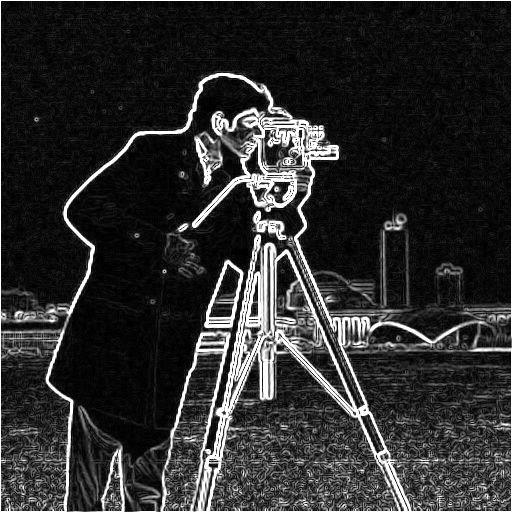

Photos for #1.iii: Sobel Filter using sobel_altered of Image 1


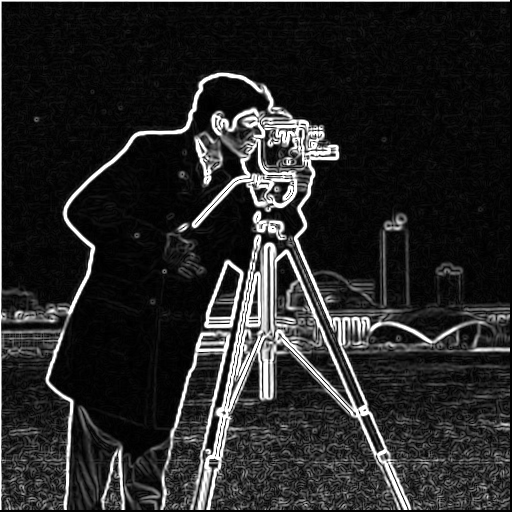

Photos for #1.i: Image 2

Original:


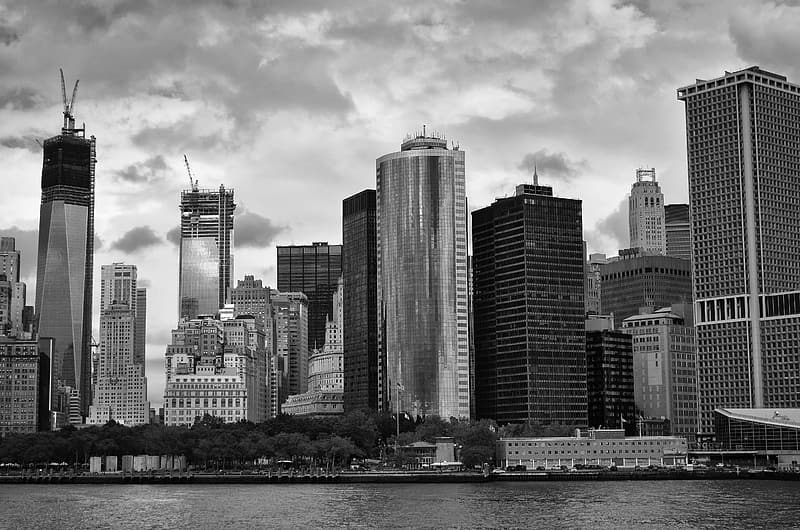

3x3 Gaussian Blur:


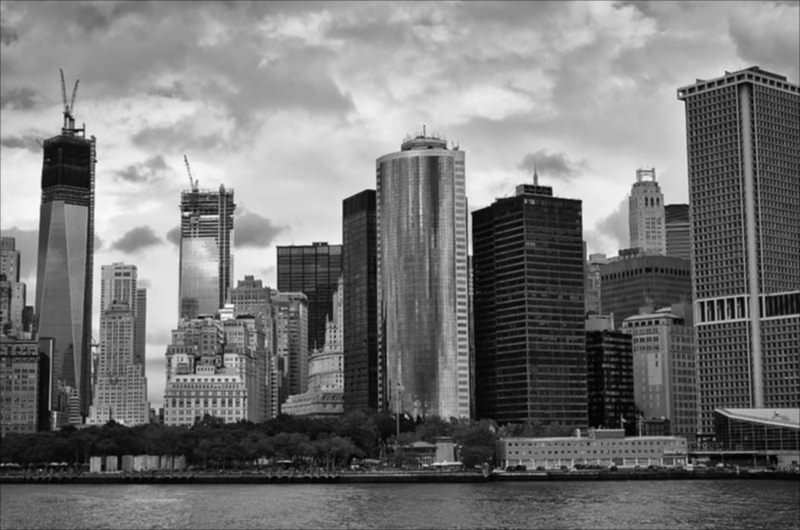

5x5 Gassian Blur:


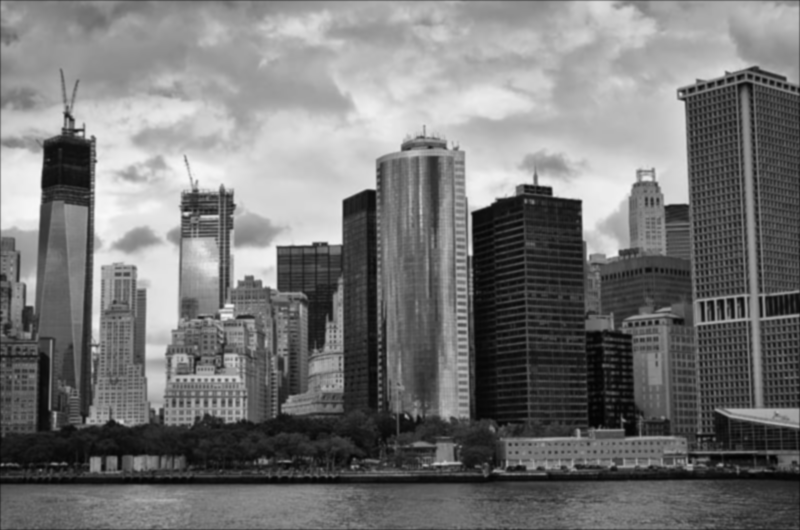

Photos for #1.ii: Using 3x3 Gaussian filtered photos of Image 2
DoG using gx filter:


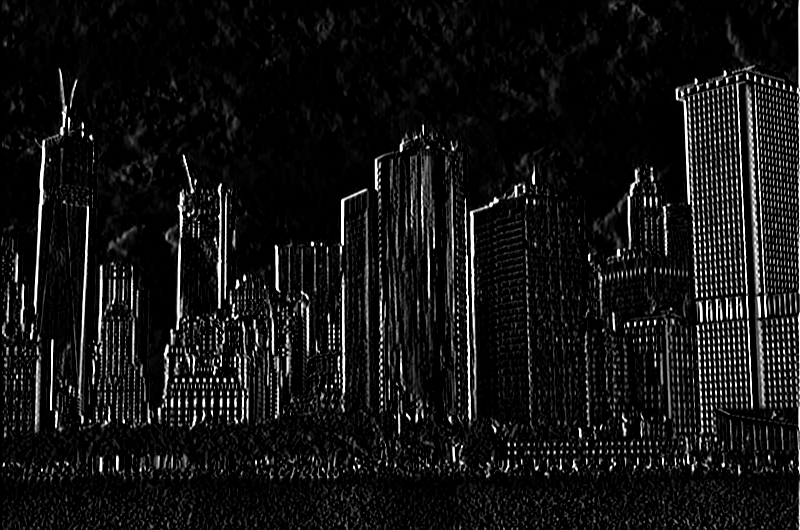

DoG using gy filter:


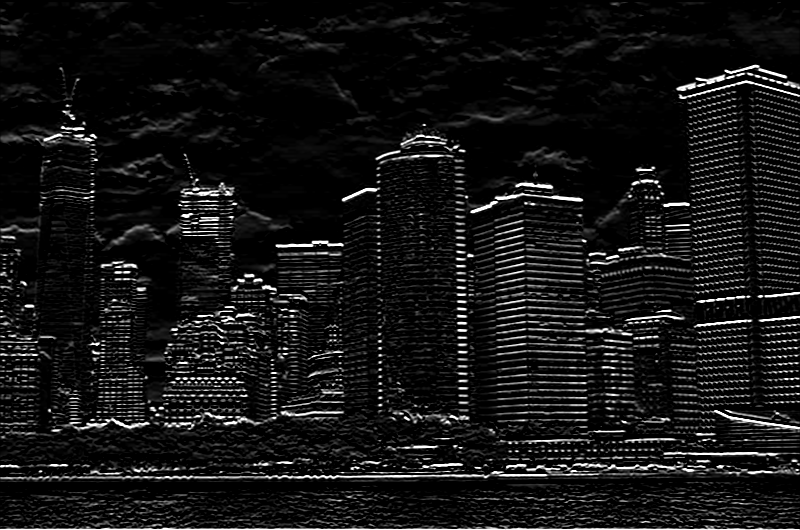

Photos for #1.iii: Sobel Filter using my_sobel_filter of Image 2


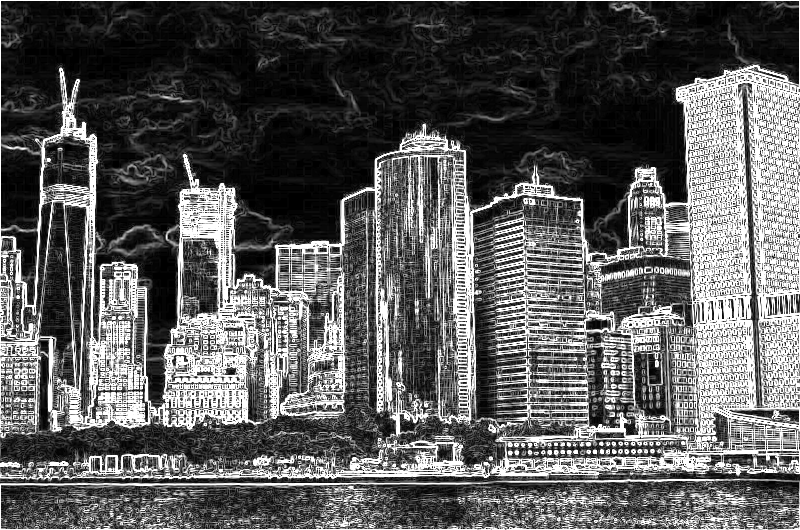

Photos for #1.iii: Sobel Filter using sobel_altered of Image 2


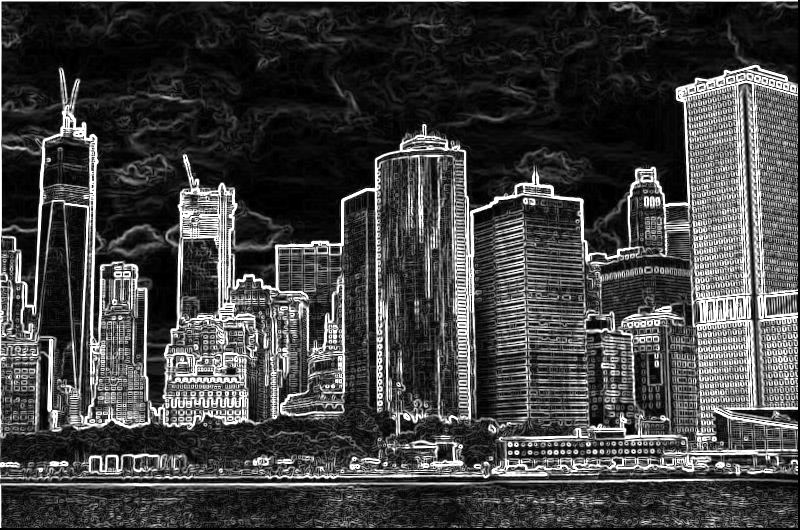

In [11]:
# I ran and tested this code using Google Colab. In order to properly display
# photos I needed to use cv2_imshow instead of cv2.imshow. This Code will run
# best in a Colab environment. I am still setting up CV2 on my home machine, but
# running into issues, so I used Colab as it is easier to run right away. I hope 
# this doesn't cause any major issues in the grading! I am hoping to have cv2
# fully installed on my machine by prog 2, I just haven't had time to debug the 
# faulty install.
# I mounted my PDX google drive to this file to store the images. I can't figure
# out how to make this mounting permanent, so the files might need to be uploaded
# and paths renamed for this to properly work. I apologize about that! 
# I heavily checked the opencv docs for how to use the functions I did. 

#Prog 1
# 1
import cv2
import numpy as np
from matplotlib import pyplot as plt
from google.colab.patches import cv2_imshow
import math

#define function to apply Gaussian filter
# 1 i.
def my_gaussian_filter(gaussian, stride, img):
  # input:
    # dim is either 3, representing 3x3 or 5, representing 5x5
    # guassian is guassian array, already normalized
    # stride and img are set outside. Img will not be altered so both can be disp
  # returns: new, gaussian filtered img
  # create a new filtered img
  filtered_img = np.zeros([len(img),len(img[0])])
  dim = len(gaussian)
  # apply padding to img, save as new img just so both unblurred and blurred
  # will have same dimensions when displaying.
  if dim == 3:
    new_img = cv2.copyMakeBorder(img, 1, 1, 1, 1, cv2.BORDER_CONSTANT, value = 0)
    endpx = len(new_img[0]) - 2
    endpy = len(new_img) - 2
  else:  #dim == 5
    new_img = cv2.copyMakeBorder(img, 2, 2, 2, 2, cv2.BORDER_CONSTANT, value = 0)
    endpx = len(new_img[0]) - 4 #bounds checking for the filter
    endpy = len(new_img) - 4
  x = 0 
  y = 0
  while (y < endpy):
    filter_sum = 0
    #element-wise multiplication of gaussian[row,col] and img[y+row,x+col]
    for row in range(0,len(gaussian)):
      for col in range(0,len(gaussian)):
        filter_sum += gaussian[row][col] * new_img[y+row][x+col]
    filtered_img[y][x] = filter_sum
    #increment x and if necessary y
    x += stride
    if (x == endpx):
      y += stride
      x = 0  
  
  return filtered_img

#1 ii. Derivative of Gaussian Filters
def my_dog_filters(stride, img):
  g_x = np.array( [[1, 0, -1],
                  [2, 0, -2],
                  [1, 0, -1]])
  g_y = np.array( [[1, 2, 1],
                  [0, 0, 0],
                  [-1, -2, -1]])
  filtered_img_gx = np.zeros([len(img),len(img[0])])
  filtered_img_gy = np.zeros([len(img),len(img[0])])
  new_img = cv2.copyMakeBorder(img, 1, 1, 1, 1, cv2.BORDER_CONSTANT, value = 0)
  endpx = len(new_img[0]) - 2
  endpy = len(new_img) - 2
  x = 0 
  y = 0
  while (y < endpy):
    filter_sum_gx = filter_sum_gy = 0
    #element-wise multiplication of gaussian[row,col] and img[y+row,x+col]
    for row in range(0,len(g_x)):
      for col in range(0,len(g_x)):
        filter_sum_gx += g_x[row][col] * new_img[y+row][x+col]
        filter_sum_gy += g_y[row][col] * new_img[y+row][x+col]
    filtered_img_gx[y][x] = filter_sum_gx
    filtered_img_gy[y][x] = filter_sum_gy
    #increment x and if necessary y
    x += stride
    if (x == endpx):
      y += stride
      x = 0  

  return filtered_img_gx, filtered_img_gy

#1 iii. Sobel Filters
def my_sobel_filter(stride, img):
  g_x = np.array( [[1, 0, -1],
                  [2, 0, -2],
                  [1, 0, -1]])
  g_y = np.array( [[1, 2, 1],
                  [0, 0, 0],
                  [-1, -2, -1]])
  filtered_img_sobel = np.zeros([len(img),len(img[0])])
  new_img = cv2.copyMakeBorder(img, 1, 1, 1, 1, cv2.BORDER_CONSTANT, value = 0)
  endpx = len(new_img[0]) - 2
  endpy = len(new_img) - 2
  x = 0 
  y = 0
  while (y < endpy):
    filter_sum_gx = filter_sum_gy = 0
    #element-wise multiplication of gaussian[row,col] and img[y+row,x+col]
    for row in range(0,len(g_x)):
      for col in range(0,len(g_x)):
        filter_sum_gx += g_x[row][col] * new_img[y+row][x+col]
        filter_sum_gy += g_y[row][col] * new_img[y+row][x+col]
    sobel_sum = filter_sum_gx ** 2
    sobel_sum += filter_sum_gy ** 2
    sobel_sum = math.sqrt(sobel_sum)
    filtered_img_sobel[y][x] = sobel_sum
    #increment x and if necessary y
    x += stride
    if (x == endpx):
      y += stride
      x = 0
  return filtered_img_sobel

# An alternate approach to the Sobel by reusing the DoG filtered images
def sobel_altered(gx_img, gy_img, stride, img):
  sobel_img = np.zeros( [len(gx_img), len(gx_img[0])] )
  endpx = len(img[0]) - 2
  endpy = len(img) - 2
  x = y = 0
  while (y < endpy):
      sobel_img[y][x] = math.sqrt( (gx_img[y][x] ** 2) + (gy_img[y][x] ** 2) )
      x += stride
      if(x == endpx):
        y += stride
        x = 0
  return sobel_img

imgpath = '/content/drive/MyDrive/CS510HW1_imgfiles/'
files = [imgpath + "filter1_img.jpg", imgpath + "filter2_img.jpg"]
gaussian3x3 = 1/16 * np.array([[1, 2, 1] 
                              ,[2, 4, 2] 
                              ,[1, 2, 1]])
gaussian5x5 = 1/273 * np.array([[1, 4, 7, 4, 1] 
                               ,[4, 16, 26, 16, 4] 
                               ,[7, 26, 41, 26, 7] 
                               ,[4, 16, 26, 16, 4] 
                               ,[1, 4, 7, 4, 1]])

stride = 1
img1 = cv2.imread(files[0])
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
img2 = cv2.imread(files[1])
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

filtered_img1_3x3 = my_gaussian_filter(gaussian3x3, stride, img1)
filtered_img1_5x5 = my_gaussian_filter(gaussian5x5, stride, img1)

filtered_img2_3x3 = my_gaussian_filter(gaussian3x3, stride, img2)
filtered_img2_5x5 = my_gaussian_filter(gaussian5x5, stride, img2)

filtered_img1_dogx, filtered_img1_dogy = my_dog_filters(stride, filtered_img1_3x3)
filtered_img2_dogx, filtered_img2_dogy = my_dog_filters(stride, filtered_img2_3x3)
# my_sobel_filter
sobel_1_1 = my_sobel_filter(stride, img1)
sobel_1_2 = my_sobel_filter(stride, img2)
#altered_sobel
sobel_2_1 = sobel_altered(filtered_img1_dogx, filtered_img1_dogy, stride, img1)
sobel_2_2 = sobel_altered(filtered_img2_dogx, filtered_img2_dogy, stride, img2)



print("Photos for #1.i: Image 1")
print("Original:")
cv2_imshow(img1)
print("3x3 Gaussian Blur:")
cv2_imshow(filtered_img1_3x3)
print("5x5 Gassian Blur:")
cv2_imshow(filtered_img1_5x5)
print("Photos for #1.ii: Using 3x3 Gaussian filtered photos of Image 1")
print("DoG using gx filter:")
cv2_imshow(filtered_img1_dogx)
print("DoG using gy filter:")
cv2_imshow(filtered_img1_dogy)
print("Photos for #1.iii: Sobel Filter using my_sobel_filter of Image 1")
cv2_imshow(sobel_1_1)
print("Photos for #1.iii: Sobel Filter using sobel_altered of Image 1")
cv2_imshow(sobel_2_1)

print("Photos for #1.i: Image 2")
print("\nOriginal:")
cv2_imshow(img2)
print("3x3 Gaussian Blur:")
cv2_imshow(filtered_img2_3x3)
print("5x5 Gassian Blur:")
cv2_imshow(filtered_img2_5x5)
print("Photos for #1.ii: Using 3x3 Gaussian filtered photos of Image 2")
print("DoG using gx filter:")
cv2_imshow(filtered_img2_dogx)
print("DoG using gy filter:")
cv2_imshow(filtered_img2_dogy)
print("Photos for #1.iii: Sobel Filter using my_sobel_filter of Image 2")
cv2_imshow(sobel_1_2)
print("Photos for #1.iii: Sobel Filter using sobel_altered of Image 2")
cv2_imshow(sobel_2_2)

# Problem 2

In [56]:
import numpy as np
import random
from matplotlib import pyplot as plt
import math
# File path setting and data cleanup
file_path = '/content/drive/MyDrive/CS510HW1_imgfiles/'
f = open(file_path + '510_cluster_dataset.txt')
dataset = []
for lines in f:
  # Some lines are separated by two spaces, some by three.
  # replacing two consecutive spaces with ~ then stripping any remaining ' '
  temp = lines.strip(" \n")
  temp = temp.replace('  ', '~')
  temp = temp.replace(' ','')
  temp = temp.split('~')
  temp[0] = float(temp[0])
  temp[1] = float(temp[1])
  dataset.append(temp)



# K Meanns. K = clusters, R = # iterations from different random starts
# can handle 2 & 3 dimensional data sets
def k_means(k, r, dataset):
  # assume: dataset is an array
  # saving dimensionality of data for easy reference later
  dimension = len(dataset[0])
  # persistent variables for saving values over iterations
  final_sse = -np.inf 
  final_centroid = []
  final_clusters = []
  for alg_iter in range(0,r):
    centroid = np.zeros([k,dimension])
    # tracking clusters separately from centroids. centroid[i] is centroid of cluster[i]
    clusters = []
    # initialize to random points
    randlist = random.sample(range(0, len(dataset)), k)
    # setting up persistent variables to compare different iterations and save
    cur_sse = 0
    for i in range(0,k):
      clusters.append([])  #each cluster now has k empty lists, for k clusters
    for j in range(0,dimension):
      centroid[i][j] = dataset[randlist[i]][j]
    converged = False
    while (converged == False):
      #assignment step
      for i in range(0, len(dataset)):
        # for each point in the data set, I need to calculate the distance between
        # that point and every item in centroid[]
        euclidian_distance = []
        for j in range(0, k):  # k centroids/clusters
          euclidian_distance.append(0)
          # first sum distance between all x, y (maybe z)
          for d in range(0, dimension):  #data could by x,y or x,y,z
            euclidian_distance[j] += ((dataset[i][d] - centroid[j][d]) ** 2)
          # take sqrt of above sum. Left with euclidian distance!  
          euclidian_distance[j] = math.sqrt(euclidian_distance[j])
        # assign centroid
        closest_centroid = euclidian_distance.index(min(euclidian_distance))
        clusters[closest_centroid].append(dataset[i])
        
      #update step
      # Here is where I'll check for if the assignments have changed or not. If 
      # assignments have not changed, then the updated cluster means should be the
      # same
      new_centroids = np.zeros([k,dimension])
      for i in range(0,k):
        # do below for each centroid
        for j in range(0, dimension):
          coord_sum = 0
          # sum all 
          for m in range(0, len(clusters[i]):
              coord_sum += clusters[i][m][j]
          new_centroids[i][j] = (1/len(clusters[i]) * coord_sum)
          # Once these don't change, we can stop. Checking equivalence with np.all
          if (np.all(new_centroids == centroid)):
            converged = True
          centroid = new_centroids
"""
            # TODO ADD PRINTING OF SEVERAL ITERATIONS FOR WRITE UP
            if dimension == 2: # graph 2-d
            else: #graph = 3-d
"""
    # if we've converged, we want to save centroids, clusters and sum sqrd error
    # calc sum sq error first
    for i in range(0,k):
        # do below for each centroid
        for j in range(0, dimension):
          # calculate distance from point in cluster to new mean, add to sse
          for m in range(0, len(clusters[i]):
              cur_sse += (clusters[i][m][j] - centroid[i][j]) ** 2]
    if (cur_sse < final_sse): 
      final_sse = cur_sse
      final_centroid = centroid
      final_cluster = clusters

  return final_sse, final_centroid, final_cluster
# dataset = [[1,2,3],[4,5,6],[7,8,9],[10,11,12],[13,14,15]]
k_means(4,3,dataset)


# Problem 3
